<a href="https://colab.research.google.com/github/PeterSBerman/nyc-public-schools/blob/main/nyc_public_schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-143-dadae172a44e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Percent Scoring 65 or Above'] = df8['Percent Scoring 65 or Above'].apply(pd.to_numeric)


<Axes: title={'center': 'Top 5 High Schools in Brooklyn for Common Core Algebra'}, ylabel='School Name'>

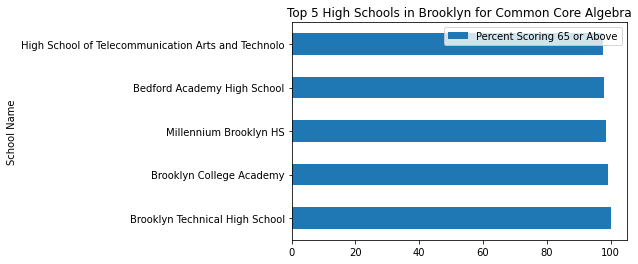

In [143]:
#for my project I will select High Schools in the boro of Brooklyn (aka Kings County) 
#and list out the top 5 schools in terms of % of students passing the regents in the year 2017 for Common Core Algebra
# i did my initial school last as my HS was closed in 2014 and made into 7 seperate schools! on the campus, so iselected one of the top 5 from results

#import numpy and pandas libraries
import numpy as np 
import pandas as pd 

#define dataframe(df) as data
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

#get a feel for the table structure and data 
df.head()

#first I will create a new dataframe with only needed columns
df2 = df[['School DBN','School Name','School Level','Regents Exam','Year','Percent Scoring 65 or Above']]

#lets remove all non High Schools and then all years except for 2017 and then all exams not Common Core Algebra and save that to a new dataframe
df3 = df2[(df2['School Level']=='High school') & (df2['Year']==2017) & (df2['Regents Exam']=='Common Core Algebra')] 

#now that we have a focused dataset, it is time to do some cleanup, lets remove all s values from the Percent Scoring 65 or Above column
df4 = df3[df3['Percent Scoring 65 or Above']!='s']

#lets not forget about removing all other boros except for Brooklyn = School DBN = K
df5 = df4[df4['School DBN'].str.contains('K')]

#create a new dataframe with only needed columns
df6 = df5[['School DBN','School Name','Percent Scoring 65 or Above']]

#sort
df7 = df6.sort_values('Percent Scoring 65 or Above', ascending=False)

#there are duplicate schools which doesn't make sense but will have to drop
df8 = df7.drop_duplicates('School DBN')

#convert Percent Scoring 65 or Above to a numeric value
df8['Percent Scoring 65 or Above'] = df8['Percent Scoring 65 or Above'].apply(pd.to_numeric)

#drop index and swap with School DBN which should be unique after deduping and keeping the highest values of the dupe schools
df8['School DBN'].is_unique
df9 = df8.set_index('School DBN')

#swap index to school name now that its singular for plotting
df10 = df9[['School Name','Percent Scoring 65 or Above']].set_index('School Name')

#grab top 5
df11 = df10.nlargest(5, 'Percent Scoring 65 or Above')

#plot results
df11.plot(kind='barh', title='Top 5 High Schools in Brooklyn for Common Core Algebra')

# conclusion: Brooklyn has many viable high schools to choose from when it comes to proficiency in Common Core Algebra. 
# Of the top 5 there is 1. Brooklyn Tech 2. Brooklyn College Academy 3.Millenium Brooklyn HS 4. Bedford Academy and 5. Telcom Arts & Tech

In [157]:

#picking school for initial comparison point
dfi = df

dfii = dfi[dfi['School Name'].str.contains('Millennium High School')]

#dfii.head() # confirm Millennium High School isolated

#dfii.min() # lowest mean score = Algebra2/Trigonometry if i'm reading this right?

#dfii.max() # U.S. History and Government had the most total tested if i'm reading this right?

#dfii.mean() # The mean total students tested per exam is 51 :) thats something! 

dfii.describe() # max students tested for this school was 186, min was 1

,Year,Total Tested
count,409.000000,409.000000
mean,2015.951100,51.100244
std,0.812015,48.834226
min,2015.000000,1.000000
25%,2015.000000,9.000000
50%,2016.000000,38.000000
75%,2017.000000,77.000000
max,2017.000000,186.000000
